Importing necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Reading the data (CSV files)

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

Understanding and verifying the data

In [3]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [4]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [6]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

In [13]:
customers.columns.tolist(), customers.shape

(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], (200, 4))

In [14]:
transactions.columns.tolist(), transactions.shape

(['TransactionID',
  'CustomerID',
  'ProductID',
  'TransactionDate',
  'Quantity',
  'TotalValue',
  'Price'],
 (1000, 7))

In [15]:
products.columns.tolist(), products.shape

(['ProductID', 'ProductName', 'Category', 'Price'], (100, 4))

In [16]:
merged_data.columns.tolist(), merged_data.shape

(['TransactionID',
  'CustomerID',
  'ProductID',
  'TransactionDate',
  'Quantity',
  'TotalValue',
  'Price_x',
  'CustomerName',
  'Region',
  'SignupDate',
  'ProductName',
  'Category',
  'Price_y'],
 (1000, 13))

# Exploratory Data Analysis (EDA)

## 1. Overview of sales by category

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


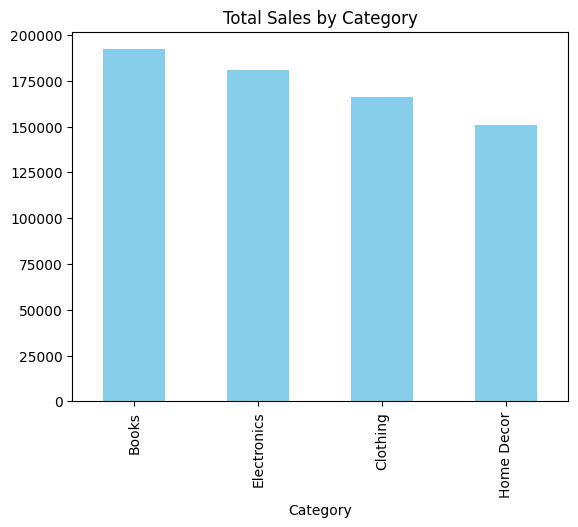

In [17]:
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_sales)
category_sales.plot(kind='bar', title="Total Sales by Category", color='skyblue')
plt.show()

## 2. Monthly sales trend

Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


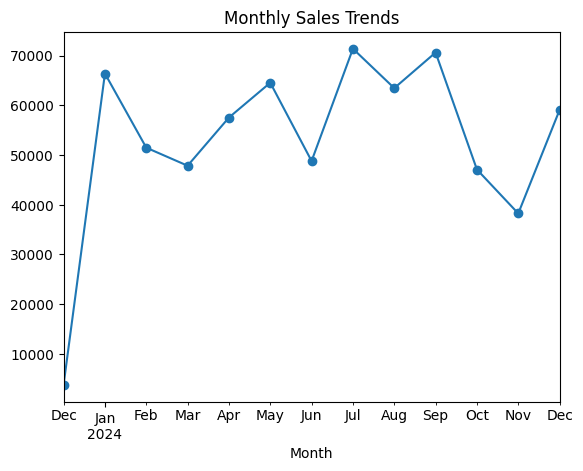

In [18]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
print(monthly_sales)
monthly_sales.plot(title="Monthly Sales Trends", marker='o')
plt.show()

## 3. Top 10 customers by revenue

CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


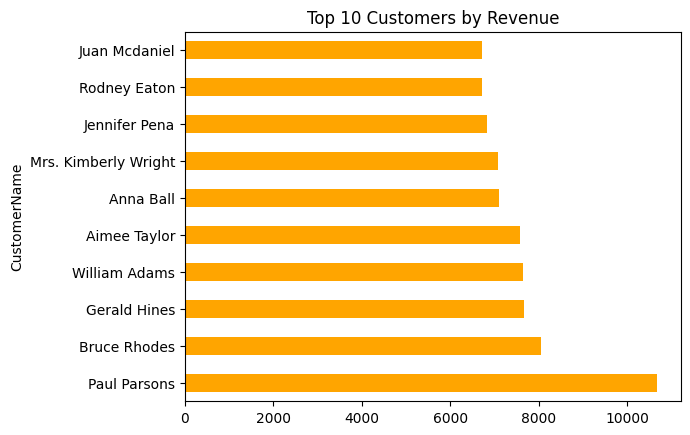

In [21]:
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)
top_customers.plot(kind='barh', title="Top 10 Customers by Revenue", color='orange')
plt.show()

## 4. Most popular products by quantity sold

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


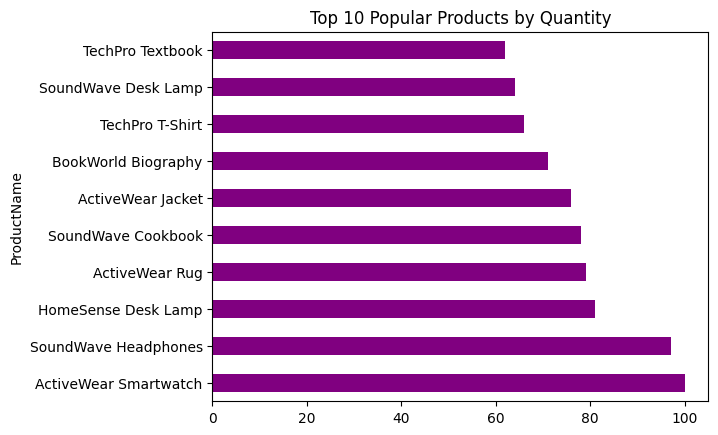

In [22]:
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print(popular_products)
popular_products.plot(kind='barh', title="Top 10 Popular Products by Quantity", color='purple')
plt.show()

## 5. Regional distribution of sales

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


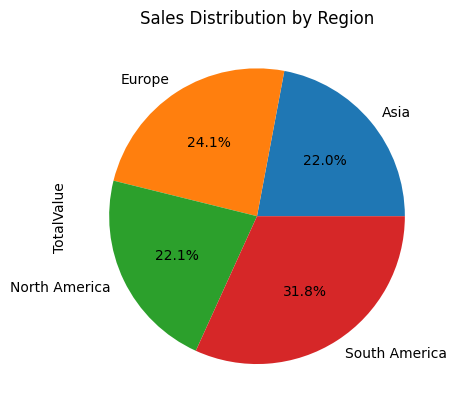

In [23]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
print(region_sales)
region_sales.plot(kind='pie', title="Sales Distribution by Region", autopct='%1.1f%%')
plt.show()

## 6. Average order value (AOV) analysis

CustomerName
Michael Harrell      1323.133333
Paul Carter          1278.110000
Catherine White      1266.426667
Karen Clements MD    1263.457500
Laura Watts          1245.720000
Benjamin Mcclure     1214.584000
Benjamin Anderson    1156.086000
Kathleen Logan       1141.440000
Cynthia Clayton      1122.050000
Matthew Rogers       1091.558000
Name: TotalValue, dtype: float64


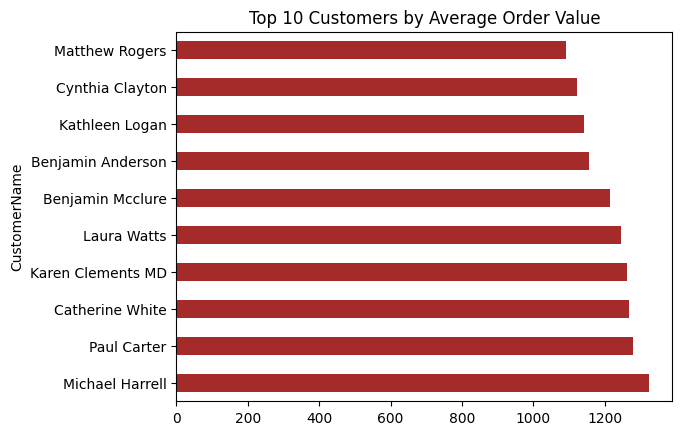

In [28]:
aov = merged_data.groupby('CustomerName')['TotalValue'].mean().sort_values(ascending=False).head(10)
print(aov)
aov.plot(kind='barh', title="Top 10 Customers by Average Order Value", color='brown')
plt.show()